# **MÓDULO 17 - Projeto de Credit Score - Parte 1 - Processamento dos dados**


Essa é a primeira etapa do processo de Credit Score que vocês desenvolverão durante nosso curso.
Nessa primeira etapa vocês irão aplicar os passos aprendidos nos módulos de pré processamento para preparar a base de vocês para o desenvolvimento do modelo.

O termo "credit score" se refere a uma pontuação numérica que representa a credibilidade de um indivíduo em termos de cumprimento de obrigações financeiras, como pagar contas de empréstimos, cartões de crédito, entre outros. Essa pontuação é calculada com base em diversas informações financeiras e de crédito do indivíduo, como histórico de pagamentos, níveis de endividamento, tempo de crédito, tipos de crédito utilizados, entre outros.

O objetivo de um modelo de credit score é prever o risco de um indivíduo se tornar inadimplente com suas obrigações financeiras. Em outras palavras, o modelo avalia a probabilidade de um indivíduo não cumprir com os pagamentos de empréstimos ou outros compromissos financeiros. Essa previsão é fundamental para instituições financeiras, como bancos e credores, na tomada de decisão sobre a concessão de crédito. Um modelo de credit score eficaz pode ajudar essas instituições a avaliar o risco de emprestar dinheiro a um determinado indivíduo e, assim, tomar decisões mais informadas sobre a aprovação ou negação de crédito, bem como sobre os termos e condições desses empréstimos.

**Atenção:** Notem que esse projeto é diferente da base que tenho trabalhado com vocês em aula, apesar de se tratar de uma base bancária durante a aula falamos sobre a variável Churn a ser prevista, nesse caso a previsão seria do valor do Score de Crédito.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving CREDIT_SCORE_PROJETO_PARTE1.csv to CREDIT_SCORE_PROJETO_PARTE1.csv


In [118]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')

df.head(10)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,"50.000,00",Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,"100.000,00",Master's Degree,Married,2,Owned,High
2,35.0,Female,"75.000,00",Doctorate,Married,1,Owned,High
3,40.0,Male,"125.000,00",High School Diploma,Single,0,Owned,High
4,45.0,Female,"100.000,00",Bachelor's Degree,Married,3,Owned,High
5,50.0,Male,"150.000,00",Master's Degree,Married,0,Owned,High
6,26.0,Female,"40.000,00",Associate's Degree,Single,0,Rented,Average
7,31.0,Male,"60.000,00",Bachelor's Degree,Single,0,Rented,Average
8,NaN,Female,"80.000,00",Master's Degree,Married,2,Owned,High
9,NaN,Male,"105.000,00",Doctorate,Single,0,Owned,High


Legenda dos dados:

*   **Age** : Idade dos nossos clientes.

*   **Income** : Salário Mensal.

*   **Gender** : Gênero.

*   **Education** : Nível de escolaridade dos clientes.

*   **Marital** : Status Civilmente.

*   **Number of Children** : Quantidade de filhos.

*   **Home** : Tipo de residência, alugada ou própria.

*   **Credit Score** : Nossa variável preditora, o score de crédito dos clientes.


# Etapa 1: Relize os passos que vimos no módulo 18, de pré processamento dos dados.

**A) Verifique os tipos de dados, fazendo as transformações quando necessário.**


In [110]:
df.dtypes

,0
Age,float64
Gender,object
Income,object
Education,object
Marital Status,object
Number of Children,int64
Home Ownership,object
Credit Score,object


In [119]:
df['Age'] = df['Age'].astype('Int64')

# Certifique-se de que não há espaços extras
df['Income'] = df['Income'].str.replace(' ', '')

df['Income'] = df['Income'].str.replace('.', '')
df['Income'] = df['Income'].str.replace(',', '.')

df['Income'] = df['Income'].astype(float)
df['Income'] = df['Income'].astype(int)

In [120]:
df.head(10)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High
5,50,Male,150000,Master's Degree,Married,0,Owned,High
6,26,Female,40000,Associate's Degree,Single,0,Rented,Average
7,31,Male,60000,Bachelor's Degree,Single,0,Rented,Average
8,<NA>,Female,80000,Master's Degree,Married,2,Owned,High
9,<NA>,Male,105000,Doctorate,Single,0,Owned,High


In [45]:
df.dtypes

,0
Age,Int64
Gender,object
Income,float64
Education,object
Marital Status,object
Number of Children,int64
Home Ownership,object
Credit Score,object


**B) Verifique se temos colunas com dados faltantes.
Caso existam colunas com dados faltantes faça o tratamento desses dados, excluindo ou substituindo esses valores. Justifique sua escolha.**

In [121]:
# Exibindo as colunas com dados faltantes e %
valores_nulos = df.isnull().sum()  # Conta valores nulos por coluna
porcentagem_nulos = (valores_nulos / len(df)) * 100

print(porcentagem_nulos)
len(df)

Age                   20.731707
Gender                 0.000000
Income                 0.000000
Education              0.000000
Marital Status         0.000000
Number of Children     0.000000
Home Ownership         0.000000
Credit Score           0.000000
dtype: float64


164

In [122]:
df.describe()

,Age,Income,Number of Children
count,130.0,164.000000,164.000000
mean,37.507692,83765.243902,0.652439
std,8.50011,32457.306728,0.883346
min,25.0,25000.000000,0.000000
25%,30.0,57500.000000,0.000000
50%,36.0,83750.000000,0.000000
75%,45.0,105000.000000,1.000000
max,53.0,162500.000000,3.000000


In [123]:
df_idade_notnull = df[df['Age'].notnull()]
df_idade_notnull.describe()

,Age,Income,Number of Children
count,130.0,130.000000,130.000000
mean,37.507692,84288.461538,0.661538
std,8.50011,33063.942361,0.902656
min,25.0,25000.000000,0.000000
25%,30.0,58125.000000,0.000000
50%,36.0,82500.000000,0.000000
75%,45.0,105000.000000,1.000000
max,53.0,162500.000000,3.000000


Por mais que tenhamos um valor considerável de dados nulos na coluna 'Age', aplicarmos a mediana para esses valores irá deturpar diversas análises ao longo do processo, dificultando a visualização de padrões, uma vez que criará um pico de artificial de idades nesse valor.

In [124]:
df = df.dropna(subset=['Age'])
df.isnull().sum()

,0
Age,0
Gender,0
Income,0
Education,0
Marital Status,0
Number of Children,0
Home Ownership,0
Credit Score,0


**C) Verifique se temos valores digitados de forma incorreta nas variáveis categóricas que necessitem de tratamento.**

In [11]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [12]:
df['Education'].unique()

array(["Bachelor's Degree", "Master's Degree", 'Doctorate',
       'High School Diploma', "Associate's Degree"], dtype=object)

In [13]:
df['Marital Status'].unique()

array(['Single', 'Married'], dtype=object)

In [14]:
df['Home Ownership'].unique()

array(['Rented', 'Owned'], dtype=object)

In [15]:
df['Credit Score'].unique()

array(['High', 'Average', 'Low'], dtype=object)

Nenhuma variável categórica possui dados inseridos de forma incorreta, logo não necessitam de tratamento.

# Etapa 2: Relize os passos que vimos no módulo 15, de análise.

**A) Realiza a análise univariada, aplique a função describe ao nosso dataframe para verificar os dados das variáveis numéricas, se encontrar a possível presença de outliers analise com gráficos a distribuição dos dados.Traga insights sobre os dados analisados.**

In [16]:
df.describe()

,Age,Income,Number of Children
count,130.0,130.000000,130.000000
mean,37.507692,84288.461538,0.661538
std,8.50011,33063.942361,0.902656
min,25.0,25000.000000,0.000000
25%,30.0,58125.000000,0.000000
50%,36.0,82500.000000,0.000000
75%,45.0,105000.000000,1.000000
max,53.0,162500.000000,3.000000


In [17]:
# BoxPlot para a variável Age
fig_age = px.box(
    df,
    y='Age',
    title='Box Plot da Idade',
    points="all",  # Mostra os outliers
    labels={'Age': 'Valores'}
)
fig_age.update_layout(
    title=dict(font=dict(size=16, family="Arial", color="darkblue")),
    yaxis=dict(title_font=dict(size=14, color="darkblue")),
    template="plotly_white",
)
fig_age.show()

Para a variável 'Age', percebemos que a idade varia entre 25 e 53 anos, aliado a isso, a média de idade dos indivíduos é cerca de 36 anos. Com a observação do gráfico, podemos observar que cerca de 75% dos individuos possui 45 anos ou menos.

In [18]:
# BoxPlot para a variável Income
fig_income = px.box(
    df,
    y='Income',
    title='Box Plot da Income',
    points="all",  # Mostra os outliers
    labels={'Income': 'Valores'}
)
fig_income.update_layout(
    title=dict(font=dict(size=16, family="Arial", color="darkblue")),
    yaxis=dict(title_font=dict(size=14, color="darkblue")),
    template="plotly_white",
)
fig_income.show()

Podemos observar que a renda média dos individuos é cerca de 82000, sendo que as rendas variam entre 25000 e 162500. É possível observar, também, um alto desvio padrão, indicando uma grande variabilidade na renda.

In [19]:
# BoxPlot para a variável Number of Children
fig_children = px.box(
    df,
    y='Number of Children',
    title='Box Plot da Quantidade de Filhos',
    points="all",  # Mostra os outliers
    labels={'Number of Children': 'Valores'}
)
fig_children.update_layout(
    title=dict(font=dict(size=16, family="Arial", color="darkblue")),
    yaxis=dict(title_font=dict(size=14, color="darkblue")),
    template="plotly_white",
)

Podemos concluir que a maioria dos indivíduos não tem filhos (mediana e 25% são 0). A média de 0.65 filhos sugere que a maioria das famílias tem 1 ou nenhum filho.

**B) Agora realize a análise univariada para as variaveis categóricas, plote gráficos para entender a distribuição das categorias e tente retirar insights de cada gráfico.**

In [20]:
# Contagem dos valores da coluna de Gênero
count_gender = df['Gender'].value_counts().reset_index()
count_gender.columns = ['Gender', 'Count']

# Calculando a porcentagem
count_gender['Porcentagem'] = (count_gender['Count'] / count_gender['Count'].sum()) * 100

# Criando o gráfico de barras da variável Gender
fig_gender = px.bar(
    count_gender,
    x='Gender',
    y='Count',
    text='Porcentagem',
    title='Distribuição da Variável Gender',
    labels={'Gender': 'Gênero', 'Count': 'Quantidade', 'Porcentagem': 'Porcentagem'},
)
fig_gender.show()

O gráfico nos traz a informação de que a maioria dos indivíduos da nossa base são do gênero Feminino, representando cerca de 52% da base.

In [21]:
# Contagem dos valores da coluna Education
count_education = df['Education'].value_counts().reset_index()
count_education.columns = ['Education', 'Count']

# Calculando a porcentagem
count_education['Porcentagem'] = (count_education['Count'] / count_education['Count'].sum()) * 100

# Criando o gráfico de barras da variável Education
fig_education = px.bar(
    count_education,
    x='Education',
    y='Count',
    text='Porcentagem',
    title='Distribuição da Variável Education',
    labels={'Education':'Nível de Escolaridade', 'Count': 'Quantidade', 'Porcentagem': 'Porcentagem'},
)
fig_education.show()

O gráfico nos mostra que a maior concentração de nível de escolaridade dos indivíduos da nossa base está em 'Bachelor's Degree', seguido por 'Master's Degree' e 'Doctorate'. Nessa visualização percebemos que a diferença não é muito discrepante, quando observamos as quantidades de individuos por nível de escolaridade.


In [22]:
# Contagem dos valores da coluna Marital Status
count_marital = df['Marital Status'].value_counts().reset_index()
count_marital.columns = ['Marital Status', 'Count']

# Calculando a porcentagem
count_marital['Porcentagem'] = (count_marital['Count'] / count_marital['Count'].sum()) * 100

# Criando o gráfico de barras da variável Marital Status
fig_marital = px.bar(
    count_marital,
    x='Marital Status',
    y='Count',
    text='Porcentagem',
    title='Distribuição da Variável Marital Status',
    labels={'Marital Status':'Marital Status', 'Count': 'Quantidade', 'Porcentagem': 'Porcentagem'},
)
fig_marital.show()

O gráfico nos traz a informação de que a maioria dos indivíduos da nossa base são Casados, representando cerca de 52% da base.

In [23]:
# Contagem dos valores da coluna Home Ownership
count_home = df['Home Ownership'].value_counts().reset_index()
count_home.columns = ['Home Ownership', 'Count']

# Calculando a porcentagem
count_home['Porcentagem'] = (count_home['Count'] / count_home['Count'].sum()) * 100

# Criando o gráfico de barras da variável Home Ownership
fig_home = px.bar(
    count_home,
    x='Home Ownership',
    y='Count',
    text='Porcentagem',
    title='Distribuição da Variável Home Ownership',
    labels={'Home Ownership':'Home Ownership', 'Count': 'Quantidade', 'Porcentagem': 'Porcentagem'},
)
fig_home.show()

É possível observar que a maioria dos indivíduos da nossa possuem imóvel próprio, enquanto a minoria de 33% tem sua moradia com aluguel.


**C) Você encontrou alguma coluna com outliers?
Se sim realize o tratamento desses casos.**

In [24]:
# Variável Age ----------------------------------------------------------------------------

# Calculando os quartis e IQR para a variável 'total_pago'
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Determinando os limites inferior e superior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificando os outliers
outliers = df[(df['Age'] < limite_inferior) | (df['Age'] > limite_superior)]

# Exibindo os outliers encontrados
print('Variável Age ---------------------------')
outliers

Variável Age ---------------------------


,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score


In [25]:
# Variável Income ----------------------------------------------------------------------------

# Calculando os quartis e IQR para a variável 'total_pago'
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

# Determinando os limites inferior e superior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificando os outliers
outliers = df[(df['Income'] < limite_inferior) | (df['Income'] > limite_superior)]

# Exibindo os outliers encontrados
print('Variável Income ---------------------------')
outliers

Variável Income ---------------------------


,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score


In [26]:
# Variável Income ----------------------------------------------------------------------------

# Calculando os quartis e IQR para a variável 'total_pago'
Q1 = df['Number of Children'].quantile(0.25)
Q3 = df['Number of Children'].quantile(0.75)
IQR = Q3 - Q1

# Determinando os limites inferior e superior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificando os outliers
outliers = df[(df['Number of Children'] < limite_inferior) | (df['Number of Children'] > limite_superior)]

# Exibindo os outliers encontrados
print('Variável Number of Children ---------------------------')
outliers

Variável Number of Children ---------------------------


,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
4,45,Female,100000.0,Bachelor's Degree,Married,3,Owned,High
33,45,Female,105000.0,Bachelor's Degree,Married,3,Owned,High
65,45,Female,110000.0,Bachelor's Degree,Married,3,Owned,High
97,45,Female,115000.0,Bachelor's Degree,Married,3,Owned,High
139,45,Female,105000.0,Bachelor's Degree,Married,3,Owned,High


In [27]:
df_3filhos = df[df['Number of Children'] == 3]
df_3filhos.count()

,0
Age,5
Gender,5
Income,5
Education,5
Marital Status,5
Number of Children,5
Home Ownership,5
Credit Score,5


Os outliers identificados foram todos na coluna 'Number of Children', onde todos indicam a quantidade de 3 filhos. Dessas forma, vou optar por não remover esses 'outliers' da base, pois posso obter observações importantes para os indivíduos que possuem 3 filhos e o comportamento que isso pode ocasionar.

**D) Realize a análise Bivariada.
Tente responder as seguintes perguntas com gráficos seguidos de insights:**



*   Existe relação entre a idade e o status civil?
*   Qual a relação entre o score de crédito e o nível de escolaridade?
*  O salário parece influenciar na idade?
* O salário parece influenciar no Score de Crédito?
* Clientes com casa própria tendem a ter um score mais alto?



In [28]:
# Existe relação entre a idade e o status civil?

fig = px.histogram(df, x='Age', color='Marital Status', barmode='stack')

# Layout
fig.update_layout(title='Relação entre Idade e Status Civil',
                  xaxis_title='Age',
                  yaxis_title='Contagem',
                  legend_title='Marital Status')
fig.show()

Faremos uma análise por faixa de idade:
* **25 a 34 anos de idade** - A maioria dos indivíduos é solteira. Vemos um maior número de casados na faixa de 30-34 anos.
* **35 a 39 anos de idade** - Todos os indivíduos da amostra, nessa faixa, correspondem ao grupo dos casados.
* **40 a 44 anos de idade** - Todos os individuos da amostra, nessa faixa, correspondem ao grupo dos solteiros.
* **45 a 53 anos de idade** - TODOS os indivíduos da amostra, nessa faixa etária, são casados.

Podemos afirmar, com cuidado, que há uma relação entre a idade e o status civil, tendo em vista que existe uma tendência clara de aumento na quantidade de casamentos conforme a idade avança. No entanto, a faixa de 40 a 44 anos pode ser um viés na amostra.



In [29]:
# Qual a relação entre o score de crédito e o nível de escolaridade?

# Calcular a porcentagem de cada categoria
df_grouped = df.groupby(['Credit Score', 'Education']).size().reset_index(name='count')
total_por_education = df_grouped.groupby('Credit Score')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_education) * 100

# Cria gráfico de barras empilhadas
fig = px.bar(df_grouped, x='Credit Score', y='percent', color='Education', barmode='stack',
             labels={'Credit Score': 'Credit Score', 'percent': 'Porcentagem', 'Education': 'Education'})

fig.update_layout(title='Relação entre Credit Score e Education',
                  yaxis_title='Porcentagem',
                  legend_title='Education')
fig.show()

* **Average Credit Score**
  * Os indivíduos com credit score medianos estão, em sua maioria, associados a graus de escolaridade como diplomas de bacharel e associado.
  * A faixa restante é ocupada, por sua maioria, por indivíduos com diploma de ensino médio, sobrando apenas uma pequena faixa de indivíduos com doutorado possuindo um score de crédito mediano.

* **High Credit Score**
  * Os indivíduos com credit score altos estão, em sua maioria, associados a graus de escolaridade maiores. Essa concentração está alocada para indivíduos com diploma de bacharel, mestrado ou doutorado.
  * Uma pequena parte desses indivíduos que possuem um score de crédito alto está alocada para aqueles com diploma de associado e diploma de ensino médio.

* **Low Credit Score**
  * Os indivíduos com credit score mais baixos estão associados diretamente a graus de escolaridade menores, como diploma de associado e diploma de ensino médio.

É possível observar que há uma relação entre scores de crédito menores para "menores" graus de escolaridade e scores de créditos maiores para "maiores" graus de escolaridade, mas não é possível determinar que este seja um fator determinante para esses valores, tendo em vista que existem indivíduos com todo tipo de grau de escolaridade possuindo credit score alto.

In [30]:
# O salário parece influenciar na idade?

# Criando o gráfico de dispersão
fig = px.scatter(df, x='Age', y='Income',
                 title='Relação entre Idade e Renda',
                 labels={'Age': 'Idade', 'Income': 'Renda'},
                 trendline='ols')  # Adiciona uma linha de tendência

# Mostrando o gráfico
fig.show()

A linha de tendência aponta um leve crescimento da renda conforme a idade aumenta, indicando que há alguma relação.
No entanto, os pontos estão muito espalhados, o que sugere que idade não é o único fator determinante para a renda.
Existem pontos de atenção, como algumas pessoas jovens com rendas muito altas e algumas pessoas mais velhas com rendas baixas.

In [31]:
# O salário parece influenciar no Score de Crédito?

fig = px.scatter(df, x='Income', y='Credit Score', color='Credit Score',
                 title='Relação entre Renda e Pontuação de Crédito',
                 labels={'Income': 'Renda', 'Credit Score': 'Pontuação de Crédito'},
                 color_continuous_scale='viridis')

fig.show()

O gráfico nos evidencia que:
* Os indivíduos com as menores rendas da amostra estão todos associados à baixos scores de crédito
* Os indivíduos com salários de 40k a 75k estão todos associados à scores medianos
* Os indivíduos com salários de 50 a 162k estão associados à scores mais altos

Embora tenhamos uma tendência clara da relação entre salário e score de crédito, não podemos afirmar que o score é determinado somente com base no salário e que, SIM, o salário é um fator que pesa muito nessa definição.

In [32]:
# Clientes com casa própria tendem a ter um score mais alto?

# Calcular a porcentagem de cada categoria
df_grouped = df.groupby(['Credit Score', 'Home Ownership']).size().reset_index(name='count')
total_por_home = df_grouped.groupby('Credit Score')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_home) * 100

# Cria gráfico de barras empilhadas
fig = px.bar(df_grouped, x='Credit Score', y='percent', color='Home Ownership', barmode='stack',
             labels={'Credit Score': 'Credit Score', 'percent': 'Porcentagem', 'Home Ownership': 'Home Ownership'})

fig.update_layout(title='Relação entre Credit Score e Home Ownership',
                  yaxis_title='Porcentagem',
                  legend_title='Home Ownership')
fig.show()

* **Average Credit Score**
  * Os indivíduos com credit score medianos estão, em sua maioria, associados a aqueles que não possuem moradia própria, correspondendo aos que vivem de aluguel.

* **High Credit Score**
  * Os indivíduos com credit score altos estão, em sua maioria, associados a aqueles que possuem moradia própria.

* **Low Credit Score**
  * Os indivíduos com credit score mais baixos são todos pertencentes ao grupo daqueles que moram de aluguel.

Observa-se então uma tendência, indicando que a moradia própria tem grande influência no score de crédito, podendo ser um fator muito importante para essa definição.

**E) Que outras perguntas te parecem fazer sentido explorarmos a resposta para conhecermos mais nossa base de dados e o comportamento dos clientes?**

 Elabore mais 3 perguntas e responda utilizando gráficos + insights.

In [33]:
# A quantidade de filhos tem influência no Salário?

fig = px.scatter(df, x='Income', y='Number of Children', color='Number of Children',
                 title='Relação entre Renda e Quantidade de Filhos',
                 labels={'Income': 'Renda', 'Number of Children': 'Quantidade de Filhos'},
                 color_continuous_scale='viridis')

fig.show()

A maioria das pessoas com renda mais baixa (até 40k) tende a ter poucos ou nenhum filho.
Conforme a renda aumenta, há uma maior dispersão de indivíduos com 1 ou 2 filhos, mas ainda há um número significativo de pessoas sem filhos.
Poucas pessoas com renda acima de 100k possuem mais de 2 filhos, sugerindo que famílias maiores são menos comuns em faixas salariais mais altas.

In [34]:
# O nível de escolaridade tem influência no Salário?

fig = px.scatter(df, x='Income', y='Education', color='Education',
                 title='Relação entre Renda e Nível de Escolaridade',
                 labels={'Income': 'Renda', 'Education': 'Nível de Escolaridade'},
                 color_continuous_scale='viridis')

fig.show()

Indivíduos com ensino superior (Bachelor’s Degree e acima) tendem a ter rendas mais altas, enquanto aqueles com High School Diploma e Associate’s Degree estão concentrados em faixas salariais menores.
O grupo de Doutorado parece ter uma renda mais estável e concentrada em valores superiores a 80k, sugerindo que maiores níveis de especialização tendem a se traduzir em melhores ganhos.
Existe um intervalo considerável de renda dentro de cada nível de escolaridade, indicando que outros fatores além da formação impactam nos rendimentos individuais.

In [35]:
# A quantidade de filhos tem influência no Score de Crédito?

# Calcular a porcentagem de cada categoria
df_grouped = df.groupby(['Credit Score', 'Number of Children']).size().reset_index(name='count')
total_por_children = df_grouped.groupby('Credit Score')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_children) * 100

# Cria gráfico de barras empilhadas
fig = px.bar(df_grouped, x='Credit Score', y='percent', color='Number of Children', barmode='stack',
             labels={'Credit Score': 'Credit Score', 'percent': 'Porcentagem', 'Number of Children': 'Number of Children'})

fig.update_layout(title='Relação entre Credit Score e Number of Children',
                  yaxis_title='Porcentagem',
                  legend_title='Number of Children')
fig.show()

Indivíduos com baixa pontuação de crédito parecem estar concentrados no grupo sem filhos, o que pode indicar maior dificuldade financeira ou menor propensão a formar famílias.
Quem tem pontuação de crédito alta apresenta maior diversidade em relação à quantidade de filhos, sugerindo que uma boa gestão financeira pode permitir maior planejamento familiar.
O grupo com pontuação média tem uma distribuição intermediária, mas ainda predominam pessoas sem filhos.

# Etapa 3: Relize os passos que vimos no módulo 17, de Correlação, Balanceamento, atributos categóricos e divisão base treino e teste.

**A) Vamos começar pela análise de correlação, plote da forma que achar melhor a análise de correlação, seja pela tabela ou pelo gráfico da matriz.**

In [36]:
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Criar o heatmap interativo
fig = px.imshow(
    correlation_matrix,
    text_auto=".3f",  # Exibe os valores na matriz com 3 casas decimais
    color_continuous_scale="RdBu_r",  # Mapa de cores semelhante ao seaborn
    labels=dict(color="Correlação"),  # Legenda do eixo de cores
    title="Matriz de Correlação"
)

# Ajustes no layout (opcional)
fig.update_layout(
    xaxis_title="Features",
    yaxis_title="Features",
    width=800,
    height=700
)

# Exibir o gráfico
fig.show()

**B) Você encontrou variáveis que tem uma média ou alta correlação? Se sim, quais? Te parece fazer sentido essas variáveis terem alta correlação? Justifique.**

* **Alta Correlação**
  * As variáveis 'Age' e 'Income' possuem alta correlação (**0.685**), o que faz sentido levando em consideração a análise bivariada que fizemos entre Renda e Idade, onde observamos o crescimento da renda conforme a idade aumenta.
* **Média Correlação**
  * As variáveis 'Number of Children' e 'Income' possuem média (baixa(?)) correlação (**0.115**), o que faz sentido quando observamos a análise feita entre Quantidade de Filhos e renda, onde há uma maior dispersão de indivíduos com 1 ou 2 filhos, mas ainda há um número significativo de pessoas sem filhos.

**C) Temos muitos atributos categóricos nessa base, não? Vamos realizar a o tratamento desses atributos utilizando Label Encoder ou one hot. Após, exclua as colunas categóricas.**

In [125]:
from sklearn.preprocessing import LabelEncoder

# Criando uma instância do Label Encoder
label_encoder = LabelEncoder()

# Aplicando o Label Encoder para a coluna "Genero"
df['Genero_encoded'] = label_encoder.fit_transform(df['Gender'])

# Aplicando o Label Encoder para a coluna "Home Ownership"
df['Home_encoded'] = label_encoder.fit_transform(df['Home Ownership'])

# Aplicando o Label Encoder para a coluna "Credit Score"
df['Credit_encoded'] = label_encoder.fit_transform(df['Credit Score'])

# Aplicando o Label Encoder para a coluna "Marital Status"
df['Marital_encoded'] = label_encoder.fit_transform(df['Marital Status'])

# Aplicando o One-hot Encoder para "Education"
df = pd.get_dummies(df, columns=['Education'], prefix='Education', drop_first=True)

print(df)

     Age  Gender  Income Marital Status  Number of Children Home Ownership  \
0     25  Female   50000         Single                   0         Rented   
1     30    Male  100000        Married                   2          Owned   
2     35  Female   75000        Married                   1          Owned   
3     40    Male  125000         Single                   0          Owned   
4     45  Female  100000        Married                   3          Owned   
..   ...     ...     ...            ...                 ...            ...   
159   29  Female   27500         Single                   0         Rented   
160   34    Male   47500         Single                   0         Rented   
161   39  Female   62500        Married                   2          Owned   
162   44    Male   87500         Single                   0          Owned   
163   49  Female   77500        Married                   1          Owned   

    Credit Score  Genero_encoded  Home_encoded  Credit_encoded 

In [126]:
for column in df.columns:
    if df[column].dtype == bool:
        df[column] = df[column].astype(int)
print(df)

     Age  Gender  Income Marital Status  Number of Children Home Ownership  \
0     25  Female   50000         Single                   0         Rented   
1     30    Male  100000        Married                   2          Owned   
2     35  Female   75000        Married                   1          Owned   
3     40    Male  125000         Single                   0          Owned   
4     45  Female  100000        Married                   3          Owned   
..   ...     ...     ...            ...                 ...            ...   
159   29  Female   27500         Single                   0         Rented   
160   34    Male   47500         Single                   0         Rented   
161   39  Female   62500        Married                   2          Owned   
162   44    Male   87500         Single                   0          Owned   
163   49  Female   77500        Married                   1          Owned   

    Credit Score  Genero_encoded  Home_encoded  Credit_encoded 

In [127]:
# Vamos dropar as colunas com os atributos categóricos
df = df.drop(['Gender','Marital Status','Home Ownership','Credit Score'], axis=1)
print(df)

     Age  Income  Number of Children  Genero_encoded  Home_encoded  \
0     25   50000                   0               0             1   
1     30  100000                   2               1             0   
2     35   75000                   1               0             0   
3     40  125000                   0               1             0   
4     45  100000                   3               0             0   
..   ...     ...                 ...             ...           ...   
159   29   27500                   0               0             1   
160   34   47500                   0               1             1   
161   39   62500                   2               0             0   
162   44   87500                   0               1             0   
163   49   77500                   1               0             0   

     Credit_encoded  Marital_encoded  Education_Bachelor's Degree  \
0                 1                1                            1   
1                 1  

**D) Vamos plotar novamente a correlação, agora observando com as variáveis categóricas. Identifique se temos novas variáveis com forte correlação.**

In [128]:
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Criar o heatmap interativo
fig = px.imshow(
    correlation_matrix,
    text_auto=".3f",  # Exibe os valores na matriz com 3 casas decimais
    color_continuous_scale="RdBu_r",  # Mapa de cores semelhante ao seaborn
    labels=dict(color="Correlação"),  # Legenda do eixo de cores
    title="Matriz de Correlação"
)

# Ajustes no layout (opcional)
fig.update_layout(
    xaxis_title="Features",
    yaxis_title="Features",
    width=800,
    height=700
)

# Exibir o gráfico
fig.show()

* **Forte Correlação Positiva** - Pode ser observada entre:
  * Age e Income
  * Income e Gênero
  * Income e Education_Master's Degree
  * Home_encoded e Marital_encoded
  * Genero_encoded e Education_Master's Degree

* **Forte Correlação Negativa** - Pode ser observada entre:
  * Age e Home_encoded
  * Income e Home_encoded
  * Number of Children e Marital_encoded
  * Number of Children e Home_encoded
  * Home_encoded e Age
  * Marital_encoded e Income

**F) Faça a separação da base em treino e teste e verifique utilizando shape:**

In [129]:
# Separar os dados em features (X) e o alvo (y) - É como se fossemos separar a resposta (churn) das demais categorias
X = df.drop('Credit_encoded', axis=1) # Considerando que 'Credit Score' é a coluna a ser predita
y = df['Credit_encoded']

In [130]:
from sklearn.model_selection import train_test_split
# Separar os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [131]:
X_train

,Age,Income,Number of Children,Genero_encoded,Home_encoded,Marital_encoded,Education_Bachelor's Degree,Education_Doctorate,Education_High School Diploma,Education_Master's Degree
37,36,85000,2,0,0,0,0,0,0,1
80,33,52500,0,1,1,1,0,0,1,0
138,40,130000,0,1,0,1,0,0,1,0
114,43,95000,0,1,0,1,0,0,0,1
28,49,65000,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
96,40,142500,0,1,0,1,0,0,1,0
131,26,55000,1,0,0,0,1,0,0,0
27,44,75000,0,1,0,1,0,0,0,1
117,29,27500,0,0,1,1,0,0,1,0


In [132]:
X_test

,Age,Income,Number of Children,Genero_encoded,Home_encoded,Marital_encoded,Education_Bachelor's Degree,Education_Doctorate,Education_High School Diploma,Education_Master's Degree
68,31,67500,0,1,1,1,1,0,0,0
53,29,27500,0,0,1,1,0,0,1,0
32,40,130000,0,1,0,1,0,0,1,0
44,42,100000,0,1,0,1,0,0,0,1
140,50,155000,0,1,0,0,0,0,0,1
69,36,90000,2,0,0,0,0,0,0,1
94,30,117500,2,1,0,0,0,0,0,1
130,31,95000,0,1,1,1,0,1,0,0
106,32,57500,0,1,1,1,0,0,0,0
39,46,95000,1,0,0,0,0,0,1,0


In [133]:
y_train

,Credit_encoded
37,1
80,0
138,1
114,1
28,1
...,...
96,1
131,0
27,1
117,2


In [134]:
y_test

,Credit_encoded
68,0
53,2
32,1
44,1
140,1
69,1
94,1
130,1
106,0
39,1


In [135]:
print('Tamanho de X_train:', X_train.shape)
print('Tamanho de y_train:', y_train.shape)
print('Tamanho de X_test:', X_test.shape)
print('Tamanho de y_test:', y_test.shape)

Tamanho de X_train: (97, 10)
Tamanho de y_train: (97,)
Tamanho de X_test: (33, 10)
Tamanho de y_test: (33,)


**G) É hora de verificar se nossa coluna de Score de crédito está balanceada, verifique através de um gráfico e traga sua opinião acerca do balanceamento.**

<Axes: xlabel='Credit_encoded'>

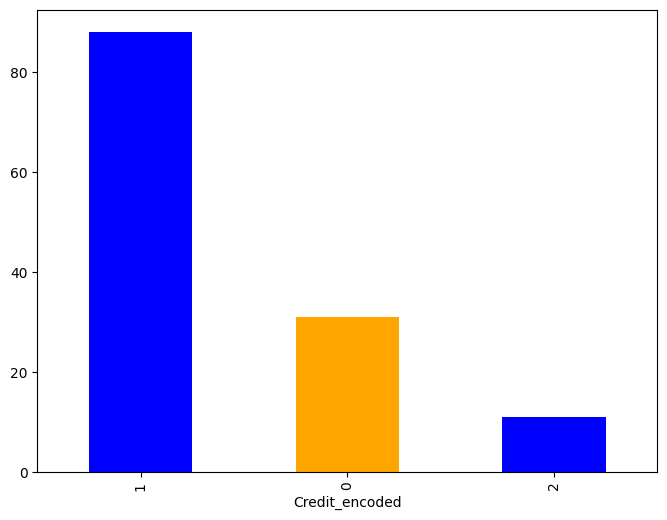

In [136]:
credit_counts = df['Credit_encoded'].value_counts()
plt.figure(figsize=(8, 6))
credit_counts.plot(kind='bar', color=['blue','orange'])

In [137]:
# Calcular e imprimir as porcentagens dos valores na coluna 'Credit_encoded'
print((df['Credit_encoded'].value_counts(normalize=True) * 100))

Credit_encoded
1    67.692308
0    23.846154
2     8.461538
Name: proportion, dtype: float64


**H) Vamos realizar o balancecamento dos dados da coluna de credit score.**
Se lembre que realizazmos apenas para a base de treino.

In [138]:
y_test.dtypes

dtype('int64')

In [145]:
X_test.dtypes

,0
Age,Int64
Income,int64
Number of Children,int64
Genero_encoded,int64
Home_encoded,int64
Marital_encoded,int64
Education_Bachelor's Degree,int64
Education_Doctorate,int64
Education_High School Diploma,int64
Education_Master's Degree,int64


In [141]:
# Garantir que y_train seja inteiro
y_train = y_train.astype(int)


In [153]:
# Certificando que todas as colunas em X_train estejam no tipo int64
X_train = X_train.astype('int64')

# Aplicando SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

# Aplicando o SMOTE aos dados de treinamento
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Verificando a distribuição das classes após o balanceamento
print("Distribuição das classes após o balanceamento:")
print(y_train_balanced.value_counts())


Distribuição das classes após o balanceamento:
Credit_encoded
1    67
0    67
2    67
Name: count, dtype: int64
